In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


In [2]:
import numpy as np

In [5]:
from sklearn import neighbors, datasets
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
import itertools

In [6]:
def normalize_feature(minRange, maxRange, values, copy=True):
    minVal = min(values)
    maxVal = max(values)

    if copy == True:
        res = []
        for (i,val) in enumerate(values):
            res.append((val - minVal) / (maxVal - minVal) * (maxRange-minRange) + minRange)
            
        return res
    else:
        for (i,val) in enumerate(values):
            values[i] = (val - minVal) / (maxVal - minVal) * (maxRange-minRange) + minRange
    
        return values

In [7]:
# mini test
t1 = [20.,10.,40.,90.,100.,30.,60.]
t2 = normalize_feature(-5,10,t1)
print(t1)
t3 = normalize_feature(-5,10,t1, False)
print(t1)
print(t2)
print(t3)

# t = preprocessing.normalize(test, norm='l2')
# t

[20.0, 10.0, 40.0, 90.0, 100.0, 30.0, 60.0]
[-3.3333333333333335, -5.0, 0.0, 8.333333333333332, 10.0, -1.666666666666667, 3.333333333333334]
[-3.3333333333333335, -5.0, 0.0, 8.333333333333332, 10.0, -1.666666666666667, 3.333333333333334]
[-3.3333333333333335, -5.0, 0.0, 8.333333333333332, 10.0, -1.666666666666667, 3.333333333333334]


Q1: Is it always useful to apply feature normalization? If you don’t think so, give an example.

NO:

1. Of course for all non-numeric values. ("White", "Black", "Pink", ....)
2. For all great selectivity values (0,1,2).
3. If the algorithm works better with integers than floats
4. If the values have several significations (1=red, 2=blue, 3=green)


In [8]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
print (X.shape)
print (y.shape)
print (np.unique(y))

(150, 4)
(150,)
[0 1 2]


We have 150 rows in our dataset.
We choose 5 as number of folds (arbitrary)

We have 4 iterations with 3 folds for trainning set and 1 for validation (the last one is kept for testing)

In [9]:
# Split datas in 2 parts (80% for trainning/validation and 20% for test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
clf = neighbors.KNeighborsClassifier(n_neighbors=3, weights='distance')

# Use 80% for trainning/validation
scores = cross_val_score(clf, X_train, y_train, cv=4)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print()

# specify trainning (K-NN) set
clf.fit(X_train, y_train)
# ask for prediction
y_pred = clf.predict(X_test)
# compute scores
accuracy_score = metrics.accuracy_score(y_test, y_pred)
precision_score = metrics.precision_score(y_test, y_pred, average=None)
classification_report = metrics.classification_report(y_test, y_pred)
print('Accuracy =', accuracy_score)
print('Precision =', precision_score)
print('Report =\n', classification_report)

[ 0.93333333  0.96666667  0.96666667  1.        ]
Accuracy: 0.97 (+/- 0.05)

Accuracy = 1.0
Precision = [ 1.  1.  1.]
Report =
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      1.00      1.00        10
          2       1.00      1.00      1.00        10

avg / total       1.00      1.00      1.00        30



Remarque:

After many tunning cycles, k=3 is enought to obtain a perfect result. The teacher say it's due to very easy dataset.

So, with 3 features and 3 neighbors 100% of samples are reconnized

Q2: What is StratifiedKFold and why/when should we use it?

Ensure all folds use a good features repartition. If data sample is sorted by features it's critical. (Trainning with sorted features cause a big deviation)

Q3: How can K-fold cross validation be used for selecting the best tuning parameters, and
the best features?
- Use K-fold cross validation to find the best n_neighbors parameter

In [10]:
# multiples try with k neighbors variations:

# Split datas in 2 parts (80% for trainning/validation and 20% for test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

res =[]
v = range(1, 16)
for k in v:
    clf = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance')
    scores = cross_val_score(clf, X_train, y_train, cv=4)
    res.append(scores.mean())
    

print(res)

[0.95833333333333337, 0.95833333333333337, 0.96666666666666667, 0.96666666666666667, 0.97499999999999998, 0.96666666666666667, 0.97499999999999998, 0.97499999999999998, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.95833333333333337, 0.96666666666666667, 0.96666666666666667, 0.97499999999999998]


Best score for k is 0.975 (5, 7, 8, 15).

Plot the accuracy as a function of n_neighbors:

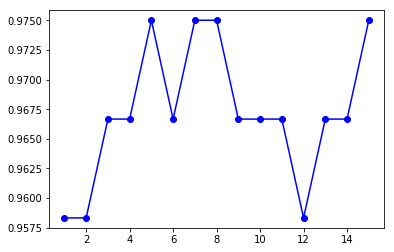

In [11]:
fig = plt.figure()
plt.plot(v, res, '-bo')

Q4: What is the best n_neighbors parameter for your experiment?

5, 7, 8, 15 neighbours having best result (0.75)

I keep 5 to avoid useless calculations

Q5: How could you improve your k-fold cross validation strategy?

Try with differents features and features combinations. The purpose is to detect good features and perhaps different "weights" for features.

In case of massive diffences between scale a good move may be to normalize features values.

In [12]:
# Print a classification report

# Split datas in 2 parts (80% for trainning/validation and 20% for test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

clf = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance')

# specify trainning (K-NN) set
clf.fit(X_train, y_train)
# ask for prediction
y_pred = clf.predict(X_test)
# compute scores
accuracy_score = metrics.accuracy_score(y_test, y_pred)
precision_score = metrics.precision_score(y_test, y_pred, average=None)
classification_report = metrics.classification_report(y_test, y_pred)
print('Accuracy =', accuracy_score)
print('Precision =', precision_score)
print('Report =\n', classification_report)

Accuracy = 1.0
Precision = [ 1.  1.  1.]
Report =
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      1.00      1.00        10
          2       1.00      1.00      1.00        10

avg / total       1.00      1.00      1.00        30



In [13]:
# Print, and plot a confusion matrix
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))

Confusion matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


In [14]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


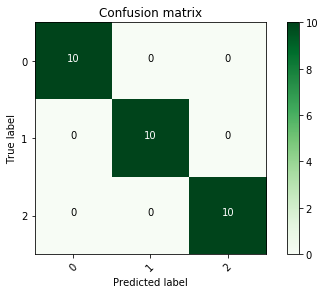

In [15]:
cm = metrics.confusion_matrix(y_test, y_pred)
cls = np.unique(y)
plot_confusion_matrix(cm,cls,title='Confusion matrix',cmap=plt.cm.Greens)

Q6: Based on the classification report and the confusion matrix, evaluate (explain in details)
your classifier performance.

The iris dataset seem's to be a little to easy ...

Next time i would use a different. But procedure stay the same:
    1. Split data between trainning/validation/test set.
    2. Iterate on trainning and validation set to find bests parameters and meta-parameters
    3. Launch final test and compute result (classification report and confusion matrix)

In [16]:
# More complicated ....
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home='./')

print(mnist.data.shape)
print(mnist.target.shape)
print(np.unique(mnist.target))

(70000, 784)
(70000,)
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]


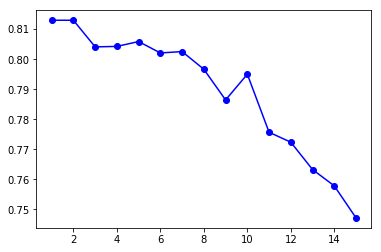

In [17]:
# We are sampling (1/100) => data = 70000 / 100 = 700 rows (just to save time ....)
X = mnist.data[::100]
y = mnist.target[::100]

# Split datas in 2 parts (80% for trainning/validation and 20% for test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

res =[]
v = range(1, 16)
for k in v:
    clf = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance')
    scores = cross_val_score(clf, X_train, y_train, cv=4)
    res.append(scores.mean())
    
fig = plt.figure()
plt.plot(v, res, '-bo')

In [18]:
# keep 2 neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=2, weights='distance')

# specify trainning (K-NN) set
clf.fit(X_train, y_train)
# ask for prediction
y_pred = clf.predict(X_test)
# compute scores
accuracy_score = metrics.accuracy_score(y_test, y_pred)
precision_score = metrics.precision_score(y_test, y_pred, average=None)
classification_report = metrics.classification_report(y_test, y_pred)
print('Accuracy =', accuracy_score)
print('Precision =', precision_score)
print('Report =\n', classification_report)

Accuracy = 0.871428571429
Precision = [ 0.93333333  0.84210526  1.          0.75        0.86666667  0.90909091
  0.92307692  0.93333333  0.8         0.8       ]
Report =
              precision    recall  f1-score   support

        0.0       0.93      1.00      0.97        14
        1.0       0.84      1.00      0.91        16
        2.0       1.00      0.79      0.88        14
        3.0       0.75      0.86      0.80        14
        4.0       0.87      0.93      0.90        14
        5.0       0.91      0.77      0.83        13
        6.0       0.92      0.92      0.92        13
        7.0       0.93      0.93      0.93        15
        8.0       0.80      0.62      0.70        13
        9.0       0.80      0.86      0.83        14

avg / total       0.88      0.87      0.87       140



Confusion matrix:
[[14  0  0  0  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0  0  0]
 [ 0  0 11  2  0  0  0  0  1  0]
 [ 0  1  0 12  0  0  0  0  0  1]
 [ 0  1  0  0 13  0  0  0  0  0]
 [ 0  0  0  1  1 10  0  0  1  0]
 [ 1  0  0  0  0  0 12  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  1]
 [ 0  1  0  1  0  1  1  0  8  1]
 [ 0  0  0  0  1  0  0  1  0 12]]
Confusion matrix, without normalization


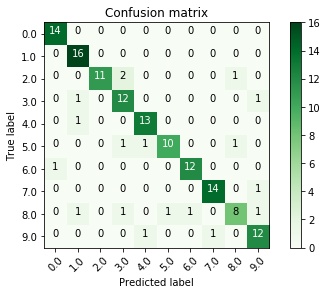

In [19]:
# Print, and plot a confusion matrix
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))
cm = metrics.confusion_matrix(y_test, y_pred)
cls = np.unique(y)
plot_confusion_matrix(cm,cls,title='Confusion matrix',cmap=plt.cm.Greens)

Q6: Based on the classification report and the confusion matrix, evaluate (explain in details) your classifier performance.
    
    1. We have 0.88 average precision score
    2. The recall and F1 score follow the same proportions
    3. In confusion matrix:
        1.The max error is on 8 character which has been considered:
            1. as 1 (1 time)
            2. as 3 (1 time)
            3. as 5 (1 time)
            4. as 6 (1 time)
            5. as 9 (1 time)
        2.The 2 character as been mistargeted 2 time as a 3.